<a href="https://colab.research.google.com/github/samkit27/Colab-Notebooks/blob/master/Classification_H2O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [ ]:
!pip install h2o


     |████████████████████████████████| 128.4MB 90kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.6-py2.py3-none-any.whl size=128412300 sha256=5a4eadabf55c82c9b1525c57ab80bb3372c0d0ebc116a9d7867f4757ae5cc2ac
  Stored in directory: /root/.cache/pip/wheels/de/4c/dd/4813e95c4b5328b4de2e2e1aa56ca66a547f45d11fe47c3c8a
Successfully built h2o


In [ ]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9herz800
  JVM stdout: /tmp/tmp9herz800/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9herz800/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_cdtk8x
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
df = h2o.import_file('/content/final_data_utilized.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
df

C1,RNTP,YBL,BDSP,MHINCP,balance,MAX_POVPIP,BLD_Type,has_FS,has_VEH,city,HHT_updated,UTIL,has_PAP,has_SSIP,has_SSP,has_PERNP,eviction
0,1592.59,5,5,16327.8,14555.2,501,house,0,1,Phoenix,1,180,0,0,0,1,N
1,849.382,6,2,3809.81,2730.43,210,appartment,1,1,Phoenix,3,230,0,0,0,1,N
2,881.234,7,2,6450.8,5439.57,458,appartment,0,1,Mesa,1,130,0,0,0,1,N
3,1061.73,8,2,6245.59,5133.86,447,appartment,0,1,Scottsdale,1,50,0,0,0,1,N
4,1274.07,7,2,2498.24,1224.16,249,appartment,0,1,Scottsdale,3,0,0,0,1,0,N
5,626.42,6,2,2239.49,1463.07,87,house,1,1,Mesa,2,150,0,0,0,1,N
6,371.605,3,1,1962.9,1471.3,116,appartment,0,1,Phoenix,2,120,0,0,1,1,N
7,424.691,18,1,2819.44,2394.75,278,vehicle,0,1,Gilbert-Chandler,3,0,0,0,1,0,N
8,1167.9,13,2,14632.5,13344.6,501,house,0,1,Phoenix,1,120,0,0,0,1,N
9,955.555,10,4,6691.71,5586.15,268,house,0,1,Gilbert-Chandler,1,150,0,0,0,1,N


In [ ]:
df.types

{'BDSP': 'int',
 'BLD_Type': 'enum',
 'C1': 'int',
 'HHT_updated': 'int',
 'MAX_POVPIP': 'int',
 'MHINCP': 'real',
 'RNTP': 'real',
 'UTIL': 'int',
 'YBL': 'int',
 'balance': 'real',
 'city': 'enum',
 'eviction': 'enum',
 'has_FS': 'int',
 'has_PAP': 'int',
 'has_PERNP': 'int',
 'has_SSIP': 'int',
 'has_SSP': 'int',
 'has_VEH': 'int'}

In [ ]:
df_train,df_test,df_valid = df.split_frame(ratios=[.7, .15])


In [ ]:
df_train

C1,RNTP,YBL,BDSP,MHINCP,balance,MAX_POVPIP,BLD_Type,has_FS,has_VEH,city,HHT_updated,UTIL,has_PAP,has_SSIP,has_SSP,has_PERNP,eviction
0,1592.59,5,5,16327.8,14555.2,501,house,0,1,Phoenix,1,180,0,0,0,1,N
1,849.382,6,2,3809.81,2730.43,210,appartment,1,1,Phoenix,3,230,0,0,0,1,N
3,1061.73,8,2,6245.59,5133.86,447,appartment,0,1,Scottsdale,1,50,0,0,0,1,N
4,1274.07,7,2,2498.24,1224.16,249,appartment,0,1,Scottsdale,3,0,0,0,1,0,N
5,626.42,6,2,2239.49,1463.07,87,house,1,1,Mesa,2,150,0,0,0,1,N
6,371.605,3,1,1962.9,1471.3,116,appartment,0,1,Phoenix,2,120,0,0,1,1,N
8,1167.9,13,2,14632.5,13344.6,501,house,0,1,Phoenix,1,120,0,0,0,1,N
9,955.555,10,4,6691.71,5586.15,268,house,0,1,Gilbert-Chandler,1,150,0,0,0,1,N
10,976.79,11,1,3212.02,2115.23,293,appartment,0,1,Tempe,2,120,0,0,0,1,N
11,849.382,6,2,7691,6781.62,501,appartment,0,1,Tempe,2,60,0,0,1,1,N


In [ ]:
df_valid

C1,RNTP,YBL,BDSP,MHINCP,balance,MAX_POVPIP,BLD_Type,has_FS,has_VEH,city,HHT_updated,UTIL,has_PAP,has_SSIP,has_SSP,has_PERNP,eviction
7,424.691,18,1,2819.44,2394.75,278,vehicle,0,1,Gilbert-Chandler,3,0,0,0,1,0,N
17,764.444,6,1,954.683,140.239,88,appartment,0,1,Mesa,3,50,0,0,1,0,Y
20,1592.59,6,2,8030.05,6237.46,501,house,0,1,Phoenix,1,200,0,0,0,1,N
26,1804.94,9,3,9814.5,7709.56,453,house,0,1,Phoenix,1,300,0,0,0,1,N
27,987.407,6,1,9189.94,8132.54,501,appartment,0,1,Phoenix,2,70,0,0,0,1,N
29,424.691,5,0,0,-504.691,0,appartment,0,1,Phoenix,2,80,0,0,0,0,Y
31,955.555,7,4,4104.25,3098.69,193,house,0,1,Gilbert-Chandler,1,50,0,0,0,1,N
45,806.913,7,1,3033.57,2096.66,277,appartment,0,1,Mesa,2,130,0,0,0,1,N
49,658.271,6,0,3372.62,2664.35,312,appartment,0,1,Scottsdale,3,50,0,0,0,1,N
50,637.037,6,2,7137.82,6370.78,343,appartment,0,0,Phoenix,3,130,0,0,0,1,N


In [ ]:
df_test

C1,RNTP,YBL,BDSP,MHINCP,balance,MAX_POVPIP,BLD_Type,has_FS,has_VEH,city,HHT_updated,UTIL,has_PAP,has_SSIP,has_SSP,has_PERNP,eviction
2,881.234,7,2,6450.8,5439.57,458,appartment,0,1,Mesa,1,130,0,0,0,1,N
15,817.531,8,3,0,-917.531,0,appartment,0,1,Gilbert-Chandler,2,100,0,0,0,0,Y
16,541.481,5,1,579.948,-51.5334,53,appartment,0,1,Phoenix,2,90,0,0,0,1,Y
25,658.271,11,3,1962.9,1104.63,91,appartment,1,1,Phoenix,3,200,0,0,0,1,N
35,1029.88,5,2,2723.08,1513.2,249,appartment,0,1,Mesa,2,180,0,0,1,0,N
48,668.889,6,2,1034.98,226.095,94,appartment,0,1,Mesa,2,140,0,0,1,0,Y
66,743.21,6,1,2284.1,1490.89,139,appartment,0,1,Phoenix,3,50,0,1,0,1,N
75,2229.63,8,2,24072.3,21472.7,501,house,0,1,Scottsdale,1,370,0,0,0,1,N
82,732.592,5,0,2230.57,1417.98,203,appartment,0,1,Tempe,3,80,0,0,0,1,N
118,594.568,7,1,0,-594.568,0,appartment,1,1,Phoenix,1,0,0,0,0,0,Y


In [ ]:
y = "eviction"
x = df.columns
x.remove(y)


In [ ]:
x

['RNTP',
 'YBL',
 'BDSP',
 'MHINCP',
 'balance',
 'MAX_POVPIP',
 'BLD_Type',
 'has_FS',
 'has_VEH',
 'city',
 'HHT_updated',
 'UTIL',
 'has_PAP',
 'has_SSIP',
 'has_SSP',
 'has_PERNP']

In [ ]:
y

'eviction'

In [ ]:
from h2o.automl import H2OAutoML


In [ ]:
aml = H2OAutoML(max_models = 10, seed = 10,balance_classes=True, nfolds=5,verbosity='info')


In [ ]:
aml.train(x = x, y = y, training_frame = df_train, validation_frame=df_valid)


AutoML progress: |
01:34:46.81: Project: AutoML_20200703_13446075
01:34:46.82: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
01:34:46.83: Setting stopping tolerance adaptively based on the training frame: 0.008704542257784912
01:34:46.83: Build control seed: 10
01:34:46.84: training frame: Frame key: automl_training_py_2_sid_b742    cols: 18    rows: 13198  chunks: 8    size: 422007  checksum: -8202820945950425795
01:34:46.84: validation frame: Frame key: py_4_sid_b742    cols: 18    rows: 2835  chunks: 8    size: 109782  checksum: 1936485217195265980
01:34:46.84: leaderboard frame: NULL
01:34:46.84: blending frame: NULL
01:34:46.84: response column: eviction
01:34:46.85: fold column: null
01:34:46.85: weights column: null
01:34:46.118: Loading execution steps: [{XGBoost : defa

In [ ]:
lb = aml.leaderboard


In [ ]:
lb.head()


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20200703_013446,1,0.000354698,1,0,0.00500944,2.50944e-05
XGBoost_2_AutoML_20200703_013446,1,0.0030229,1,0,0.00754137,5.68723e-05
GBM_1_AutoML_20200703_013446,1,0.000706421,1,0,0.0142461,0.000202951
StackedEnsemble_AllModels_AutoML_20200703_013446,1,0.00043701,0.999999,4.5438e-05,0.00934005,8.72366e-05
GBM_3_AutoML_20200703_013446,1,0.000792067,0.999998,9.0876e-05,0.0139123,0.000193551
GBM_2_AutoML_20200703_013446,1,0.00097595,0.999998,9.0876e-05,0.0144854,0.000209826
GBM_4_AutoML_20200703_013446,0.999999,0.000970135,0.999996,0.000136314,0.0147917,0.000218795
GBM_5_AutoML_20200703_013446,0.999999,0.000951462,0.999995,0.000136314,0.0148609,0.000220847
DRF_1_AutoML_20200703_013446,0.999996,0.0233688,0.999978,0.000181752,0.081761,0.00668486
XGBoost_1_AutoML_20200703_013446,0.999992,0.00289207,0.999959,0.00296263,0.0285172,0.000813232


In [ ]:
eviction_pred=aml.leader.predict(df_test)


stackedensemble prediction progress: |████████████████████████████████████| 100%


In [ ]:
eviction_pred.head()


predict,N,Y
N,0.99991,9.02858e-05
Y,0.000217345,0.999783
Y,0.000309897,0.99969
N,0.999905,9.45493e-05
N,0.99991,9.03542e-05
Y,0.000272287,0.999728
N,0.99991,9.0323e-05
N,0.99991,9.03731e-05
N,0.99991,9.03146e-05
Y,0.000302091,0.999698


In [ ]:
aml.leader.model_performance(df_test)



ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 5.229739299823839e-07
RMSE: 0.0007231693646597482
LogLoss: 0.00021230652161926994
Null degrees of freedom: 2830
Residual degrees of freedom: 2826
Null deviance: 2629.0203973071975
Residual deviance: 1.2020795254082706
AIC: 11.202079525408271
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9856845394715646: 


,,N,Y,Error,Rate
0,N,2335.0,0.0,0.0,(0.0/2335.0)
1,Y,0.0,496.0,0.0,(0.0/496.0)
2,Total,2335.0,496.0,0.0,(0.0/2831.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.985685,1.000000,232.0
1,max f2,0.985685,1.000000,232.0
2,max f0point5,0.985685,1.000000,232.0
3,max accuracy,0.985685,1.000000,232.0
4,max precision,0.999783,1.000000,0.0
5,max recall,0.985685,1.000000,232.0
6,max specificity,0.999783,1.000000,0.0
7,max absolute_mcc,0.985685,1.000000,232.0
8,max min_per_class_accuracy,0.985685,1.000000,232.0
9,max mean_per_class_accuracy,0.985685,1.000000,232.0



Gains/Lift Table: Avg response rate: 17.52 %, avg score: 17.52 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010244,0.999783,5.707661,5.707661,1.0,0.999783,1.000000,0.999783,0.058468,0.058468,470.766129,470.766129,0.058468
1,2,0.020134,0.999783,5.707661,5.707661,1.0,0.999783,1.000000,0.999783,0.056452,0.114919,470.766129,470.766129,0.114919
2,3,0.030025,0.999783,5.707661,5.707661,1.0,0.999783,1.000000,0.999783,0.056452,0.171371,470.766129,470.766129,0.171371
3,4,0.040268,0.999782,5.707661,5.707661,1.0,0.999782,1.000000,0.999783,0.058468,0.229839,470.766129,470.766129,0.229839
4,5,0.050159,0.999782,5.707661,5.707661,1.0,0.999782,1.000000,0.999783,0.056452,0.286290,470.766129,470.766129,0.286290
5,6,0.100318,0.999747,5.707661,5.707661,1.0,0.999774,1.000000,0.999778,0.286290,0.572581,470.766129,470.766129,0.572581
6,7,0.150124,0.999156,5.707661,5.707661,1.0,0.999584,1.000000,0.999714,0.284274,0.856855,470.766129,470.766129,0.856855
7,8,0.200283,0.000174,2.853831,4.992945,0.5,0.498400,0.874780,0.874164,0.143145,1.000000,185.383065,399.294533,0.969593
8,9,0.300247,0.000092,0.000000,3.330588,0.0,0.000105,0.583529,0.583154,0.000000,1.000000,-100.000000,233.058824,0.848394
9,10,0.403744,0.000090,0.000000,2.476815,0.0,0.000091,0.433946,0.433690,0.000000,1.000000,-100.000000,147.681540,0.722912


In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [ ]:
model_ids

['StackedEnsemble_BestOfFamily_AutoML_20200703_013446',
 'XGBoost_2_AutoML_20200703_013446',
 'GBM_1_AutoML_20200703_013446',
 'StackedEnsemble_AllModels_AutoML_20200703_013446',
 'GBM_3_AutoML_20200703_013446',
 'GBM_2_AutoML_20200703_013446',
 'GBM_4_AutoML_20200703_013446',
 'GBM_5_AutoML_20200703_013446',
 'DRF_1_AutoML_20200703_013446',
 'XGBoost_1_AutoML_20200703_013446',
 'XGBoost_3_AutoML_20200703_013446',
 'GLM_1_AutoML_20200703_013446']

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_20200703_013446


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 1.7666194751019778e-05
RMSE: 0.004203117265913453
LogLoss: 0.0022294733069037377
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9515695571899414: 


,,N,Y,Error,Rate
0,N,11004.0,0.0,0.0,(0.0/11004.0)
1,Y,0.0,2194.0,0.0,(0.0/2194.0)
2,Total,11004.0,2194.0,0.0,(0.0/13198.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.951570,1.000000,135.0
1,max f2,0.951570,1.000000,135.0
2,max f0point5,0.951570,1.000000,135.0
3,max accuracy,0.951570,1.000000,135.0
4,max precision,0.996362,1.000000,0.0
5,max recall,0.951570,1.000000,135.0
6,max specificity,0.996362,1.000000,0.0
7,max absolute_mcc,0.951570,1.000000,135.0
8,max min_per_class_accuracy,0.951570,1.000000,135.0
9,max mean_per_class_accuracy,0.951570,1.000000,135.0



Gains/Lift Table: Avg response rate: 16.62 %, avg score: 16.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.023640,0.996357,6.015497,6.015497,1.000000,0.996357,1.000000,0.996357,0.142206,0.142206,501.549681,501.549681,0.142206
1,2,0.046143,0.996163,6.015497,6.015497,1.000000,0.996165,1.000000,0.996263,0.135369,0.277575,501.549681,501.549681,0.277575
2,3,0.056524,0.995994,6.015497,6.015497,1.000000,0.995995,1.000000,0.996214,0.062443,0.340018,501.549681,501.549681,0.340018
3,4,0.100773,0.994671,6.015497,6.015497,1.000000,0.995426,1.000000,0.995868,0.266180,0.606199,501.549681,501.549681,0.606199
4,5,0.150023,0.989575,6.015497,6.015497,1.000000,0.992701,1.000000,0.994828,0.296263,0.902461,501.549681,501.549681,0.902461
5,6,0.200182,0.003703,1.944587,4.995458,0.323263,0.322334,0.830431,0.826323,0.097539,1.000000,94.458658,399.545799,0.959288
6,7,0.356796,0.001015,0.000000,2.802718,0.000000,0.001505,0.465916,0.464272,0.000000,1.000000,-100.000000,180.271820,0.771447
7,8,0.411956,0.000976,0.000000,2.427442,0.000000,0.000984,0.403531,0.402239,0.000000,1.000000,-100.000000,142.744160,0.705289
8,9,1.000000,0.000880,0.000000,1.000000,0.000000,0.000884,0.166237,0.166224,0.000000,1.000000,-100.000000,0.000000,0.000000




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 1.801937160157231e-05
RMSE: 0.004244923038356798
LogLoss: 0.002172046063484429
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9558902382850647: 


,,N,Y,Error,Rate
0,N,2385.0,0.0,0.0,(0.0/2385.0)
1,Y,0.0,450.0,0.0,(0.0/450.0)
2,Total,2385.0,450.0,0.0,(0.0/2835.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.955890,1.000000,89.0
1,max f2,0.955890,1.000000,89.0
2,max f0point5,0.955890,1.000000,89.0
3,max accuracy,0.955890,1.000000,89.0
4,max precision,0.996362,1.000000,0.0
5,max recall,0.955890,1.000000,89.0
6,max specificity,0.996362,1.000000,0.0
7,max absolute_mcc,0.955890,1.000000,89.0
8,max min_per_class_accuracy,0.955890,1.000000,89.0
9,max mean_per_class_accuracy,0.955890,1.000000,89.0



Gains/Lift Table: Avg response rate: 15.87 %, avg score: 15.87 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.022928,0.996357,6.300000,6.300000,1.000000,0.996357,1.000000,0.996357,0.144444,0.144444,530.000000,530.000000,0.144444
1,2,0.041975,0.996163,6.300000,6.300000,1.000000,0.996164,1.000000,0.996270,0.120000,0.264444,530.000000,530.000000,0.264444
2,3,0.051499,0.995994,6.300000,6.300000,1.000000,0.995994,1.000000,0.996219,0.060000,0.324444,530.000000,530.000000,0.324444
3,4,0.103704,0.994003,6.300000,6.300000,1.000000,0.995253,1.000000,0.995733,0.328889,0.653333,530.000000,530.000000,0.653333
4,5,0.152381,0.980289,6.300000,6.300000,1.000000,0.991133,1.000000,0.994263,0.306667,0.960000,530.000000,530.000000,0.960000
5,6,0.200353,0.002668,0.833824,4.991197,0.132353,0.134749,0.792254,0.788464,0.040000,1.000000,-16.617647,399.119718,0.950524
6,7,0.333686,0.001015,0.000000,2.996829,0.000000,0.001369,0.475687,0.473959,0.000000,1.000000,-100.000000,199.682875,0.792034
7,8,0.462434,0.000905,0.000000,2.162471,0.000000,0.000939,0.343249,0.342264,0.000000,1.000000,-100.000000,116.247140,0.638994
8,9,1.000000,0.000880,0.000000,1.000000,0.000000,0.000880,0.158730,0.158748,0.000000,1.000000,-100.000000,0.000000,0.000000




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 5.687232701233514e-05
RMSE: 0.007541374345060398
LogLoss: 0.0030228966710103985
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8339943885803223: 


,,N,Y,Error,Rate
0,N,11004.0,0.0,0.0,(0.0/11004.0)
1,Y,0.0,2194.0,0.0,(0.0/2194.0)
2,Total,11004.0,2194.0,0.0,(0.0/13198.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.833994,1.000000,209.0
1,max f2,0.833994,1.000000,209.0
2,max f0point5,0.833994,1.000000,209.0
3,max accuracy,0.833994,1.000000,209.0
4,max precision,0.996714,1.000000,0.0
5,max recall,0.833994,1.000000,209.0
6,max specificity,0.996714,1.000000,0.0
7,max absolute_mcc,0.833994,1.000000,209.0
8,max min_per_class_accuracy,0.833994,1.000000,209.0
9,max mean_per_class_accuracy,0.833994,1.000000,209.0



Gains/Lift Table: Avg response rate: 16.62 %, avg score: 16.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010683,0.996632,6.015497,6.015497,1.000000,0.996672,1.000000,0.996672,0.064266,0.064266,501.549681,501.549681,0.064266
1,2,0.020003,0.996544,6.015497,6.015497,1.000000,0.996583,1.000000,0.996631,0.056062,0.120328,501.549681,501.549681,0.120328
2,3,0.030232,0.996285,6.015497,6.015497,1.000000,0.996437,1.000000,0.996565,0.061531,0.181860,501.549681,501.549681,0.181860
3,4,0.040006,0.995754,6.015497,6.015497,1.000000,0.996083,1.000000,0.996447,0.058797,0.240656,501.549681,501.549681,0.240656
4,5,0.050083,0.994792,6.015497,6.015497,1.000000,0.995186,1.000000,0.996194,0.060620,0.301276,501.549681,501.549681,0.301276
5,6,0.101531,0.993081,6.015497,6.015497,1.000000,0.993964,1.000000,0.995064,0.309480,0.610757,501.549681,501.549681,0.610757
6,7,0.150098,0.983502,6.015497,6.015497,1.000000,0.990469,1.000000,0.993577,0.292160,0.902917,501.549681,501.549681,0.902917
7,8,0.200030,0.006186,1.944311,4.999242,0.323217,0.320295,0.831061,0.825512,0.097083,1.000000,94.431080,399.924242,0.959469
8,9,0.300121,0.001662,0.000000,3.331987,0.000000,0.003120,0.553901,0.551243,0.000000,1.000000,-100.000000,233.198687,0.839422
9,10,0.515684,0.001109,0.000000,1.939171,0.000000,0.001178,0.322363,0.321308,0.000000,1.000000,-100.000000,93.917132,0.580880




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,auc,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,aucpr,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,err,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,err_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,f0point5,1.0,0.0,1.0,1.0,1.0,1.0,1.0
6,f1,1.0,0.0,1.0,1.0,1.0,1.0,1.0
7,f2,1.0,0.0,1.0,1.0,1.0,1.0,1.0
8,lift_top_group,6.0165057,0.08726845,5.9863944,5.9863944,6.12529,5.9038033,6.080645
9,logloss,0.0030228721,1.6865393E-4,0.0031032565,0.0031728619,0.0031561991,0.0028197784,0.0028622644



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-07-03 01:35:09,7.117 sec,0.0,0.500000,0.693147,0.5,0.166237,1.000000,0.833763,0.500000,0.693147,0.5,0.15873,1.0,0.84127
1,,2020-07-03 01:35:09,7.422 sec,5.0,0.107787,0.112962,1.0,1.000000,6.015497,0.000000,0.107259,0.112502,1.0,1.00000,6.3,0.00000
2,,2020-07-03 01:35:10,7.652 sec,10.0,0.026056,0.025379,1.0,1.000000,6.015497,0.000000,0.025862,0.025233,1.0,1.00000,6.3,0.00000
3,,2020-07-03 01:35:10,7.767 sec,15.0,0.008354,0.006972,1.0,1.000000,6.015497,0.000000,0.008263,0.006879,1.0,1.00000,6.3,0.00000
4,,2020-07-03 01:35:10,7.898 sec,20.0,0.003914,0.002367,1.0,1.000000,6.015497,0.000000,0.004037,0.002317,1.0,1.00000,6.3,0.00000
5,,2020-07-03 01:35:10,8.072 sec,25.0,0.004079,0.002233,1.0,1.000000,6.015497,0.000000,0.004134,0.002178,1.0,1.00000,6.3,0.00000
6,,2020-07-03 01:35:10,8.282 sec,30.0,0.004178,0.002229,1.0,1.000000,6.015497,0.000000,0.004222,0.002172,1.0,1.00000,6.3,0.00000
7,,2020-07-03 01:35:10,8.464 sec,35.0,0.004193,0.002229,1.0,1.000000,6.015497,0.000000,0.004235,0.002172,1.0,1.00000,6.3,0.00000
8,,2020-07-03 01:35:11,8.611 sec,40.0,0.004203,0.002229,1.0,1.000000,6.015497,0.000000,0.004245,0.002172,1.0,1.00000,6.3,0.00000
9,,2020-07-03 01:35:11,8.768 sec,45.0,0.004194,0.002229,1.0,1.000000,6.015497,0.000000,0.004237,0.002172,1.0,1.00000,6.3,0.00000



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,balance,9745.931641,1.000000,0.819647
1,MHINCP,1355.317993,0.139065,0.113984
2,has_PERNP,689.300537,0.070727,0.057971
3,RNTP,49.865978,0.005117,0.004194
4,has_SSP,29.268618,0.003003,0.002462
5,has_FS,10.693024,0.001097,0.000899
6,UTIL,8.328384,0.000855,0.000700
7,BDSP,1.693075,0.000174,0.000142


In [ ]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])


In [ ]:
out.params


{'backend': {'actual': 'auto', 'default': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False},
 'calibrate_model': {'actual': False, 'default': False},
 'calibration_frame': {'actual': None, 'default': None},
 'categorical_encoding': {'actual': 'AUTO', 'default': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0},
 'distribution': {'actual': 'bernoulli', 'default': 'AUTO'},
 'dmatrix_type': {'actual': 'auto', 'default': 'auto'},
 'eta': {'actual': 0.3, 'default': 0.3},
 'export_checkpoints_dir': {'actual': None, 'default': None},
 'fold_assignment': {'actual': 'Modulo', 'default': 'AUTO'},
 'fold_column': {'actual': None, 'default': None},
 'gainslift_bins': {'actual': -1, 'default': -1},

In [ ]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9515695571899414: 


,,N,Y,Error,Rate
0,N,11004.0,0.0,0.0,(0.0/11004.0)
1,Y,0.0,2194.0,0.0,(0.0/2194.0)
2,Total,11004.0,2194.0,0.0,(0.0/13198.0)


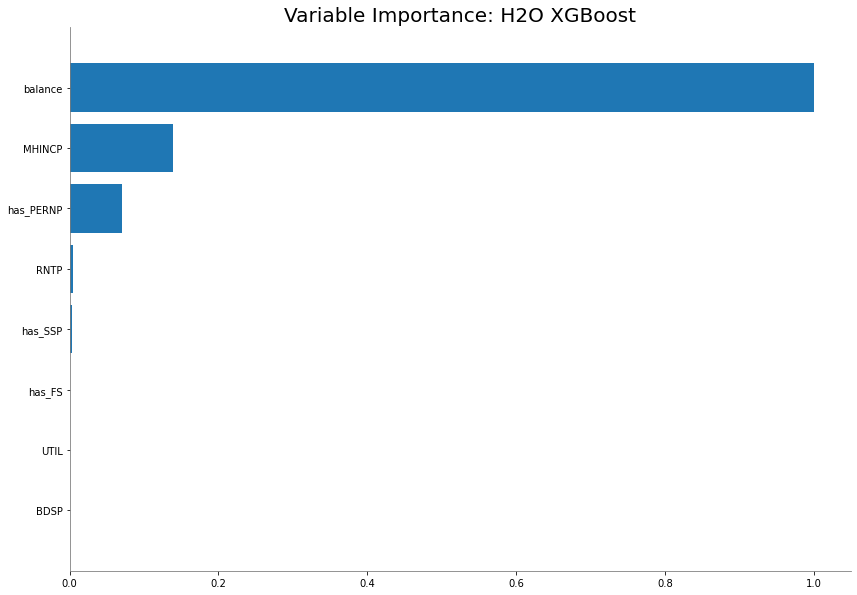

In [ ]:
out.varimp_plot()


In [ ]:
aml.leader.download_mojo(path = "./")


'/content/StackedEnsemble_BestOfFamily_AutoML_20200703_013446.zip'